Example 2
=========

This notebook is available on github
[here](https://github.com/aezarebski/aas-extended-examples). If you find
errors or would like to suggest an improvement, feel free to create an
issue.

As usual we will start by importing some useful libraries.

In [1]:
%matplotlib inline
import pandas as pd
import numpy as np
import seaborn as sns
import scipy.stats as stats
import statsmodels.api as sm
import statsmodels.formula.api as smf
import matplotlib.pyplot as plt

The data in `data-auto.csv` is a popular dataset of car characteristics. We will be looking at the horsepower and miles per gallon (MPG) obtained by these cars. The model we will consider in this notebook is a simple linear regression:

$$
\text{mpg}_{i} = \alpha + \beta \text{horsepower}_{i} + \epsilon_{i}
$$

where the $\epsilon_{i}$ are IID normal fluctuations. We will estimate the parameters $\alpha$ and $\beta$.

In [85]:
df = pd.read_csv("data-auto.csv")
df['horsepower_inv'] = df["horsepower"].to_numpy() ** -1.5

y = df["mpg"].to_numpy()
x = df['horsepower_inv'].to_numpy()
y_bar = y.mean()
x_bar = x.mean()

### Question

Plot the horsepower and MPG, describe the relationship between these variables.

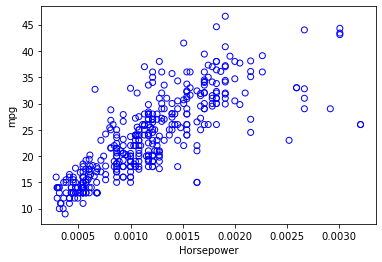

In [86]:
plt.figure()
plt.scatter(x=x,y=y,marker="o",facecolors='none', edgecolors='b')
plt.xlabel("Horsepower")
plt.ylabel("mpg")
plt.show()

### Question

Using the formula you saw in lectures, calculate the least squares estimates $\hat{\beta}$ and $\hat{\alpha}$

In [87]:
beta = np.sum((x - x_bar) * (y - y_bar)) / np.sum((x - x_bar) * (x - x_bar))
alpha = y_bar - beta * x_bar

### Question

Using your parameter estimates, calculate the expected values for the MPG, $\hat{y}_{i}$, and the residuals, $e_{i}$.

In [88]:
y_hat = alpha + beta * x
residuals = y - y_hat

### Question

Plot the model fit and the residuals. Are the assumptions (linearity, constant variance and independenc) of the model valid? What does the model predict would be the MPG for a car with the power of 400 horses?

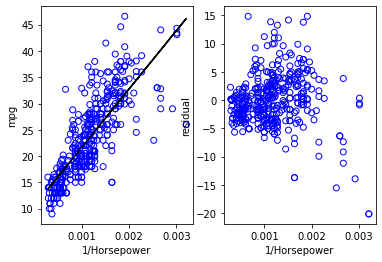

A car with 400 horsepower would be projected to get 38.32856257363267 mpg.


In [89]:
fig, axs = plt.subplots(1, 2)
axs[0].scatter(x=x,y=y,marker="o",facecolors='none', edgecolors='b')
axs[0].set_xlabel("1/Horsepower")
axs[0].set_ylabel("mpg")
axs[0].plot(x,y_hat,color='k')

axs[1].scatter(x=x,y=residuals,marker="o",facecolors='none', edgecolors='b')
axs[1].set_xlabel("1/Horsepower")
axs[1].set_ylabel("residual")

plt.show()

print(f"A car with 400 horsepower would be projected to get {alpha + 1/400*beta} mpg.")

### Question

Calculate the correlation coeffient, and $R^{2}$.

In [66]:
corr_coef = np.sum((x - x_bar) * (y - y_bar)) / (np.sqrt(np.sum((x - x_bar) * (x - x_bar))) * np.sqrt(np.sum((y - y_bar) * (y - y_bar))))

total_sum_sqrs = np.sum((y - y_bar)**2)
reg_sum_sqrs = np.sum((y - y_bar)**2)
res_sum_sqrs = np.sum((y - y_hat)**2)

r_sqrd = 1 - res_sum_sqrs / total_sum_sqrs

print(r_sqrd)
print(corr_coef**2)

0.6059482578894348
0.6059482578894345


### Question

Calculate the confidence intervals on your estimates. Is the result significant?

In [67]:
n = df.shape[0]
sigma_hat = np.sqrt(res_sum_sqrs / (n - 2))

s_x = np.sum(x**2)
s_xx = np.sum((x - x_bar)**2)

var_beta_hat = sigma_hat**2 / s_xx

var_alpha_hat = sigma_hat**2 * s_x / (n * s_xx)

t_val = stats.t.ppf(0.975, df = n-2)

alpha_ci = (
    alpha - t_val * np.sqrt(var_alpha_hat),
    alpha + t_val * np.sqrt(var_alpha_hat)
)

beta_ci = (
    beta - t_val * np.sqrt(var_beta_hat),
    beta + t_val * np.sqrt(var_beta_hat)
)

print(alpha_ci)
print(beta_ci)

(38.525211789229616, 41.34651025311132)
(-0.17051700846435697, -0.14517245824295028)


### `statsmodels`

We are finally ready to use the `statsmodel` package. In the following code we perform ordinary least squares regression and print out a summary. You can see that all of the estimates agree with those we calculated above.

In [68]:
my_lm = smf.ols("mpg ~ horsepower", df).fit()
print(my_lm.summary())

                            OLS Regression Results                            
Dep. Variable:                    mpg   R-squared:                       0.606
Model:                            OLS   Adj. R-squared:                  0.605
Method:                 Least Squares   F-statistic:                     599.7
Date:                Thu, 04 Nov 2021   Prob (F-statistic):           7.03e-81
Time:                        10:40:15   Log-Likelihood:                -1178.7
No. Observations:                 392   AIC:                             2361.
Df Residuals:                     390   BIC:                             2369.
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept     39.9359      0.717     55.660      0.0

In [ ]:
my_lm.predict(x)

ERROR! Session/line number was not unique in database. History logging moved to new session 407


In [103]:
my_lm = smf.ols("mpg ~ pow(horsepower,-1.0) + horsepower", df).fit()
print(my_lm.summary())

                            OLS Regression Results                            
Dep. Variable:                    mpg   R-squared:                       0.672
Model:                            OLS   Adj. R-squared:                  0.670
Method:                 Least Squares   F-statistic:                     398.1
Date:                Thu, 04 Nov 2021   Prob (F-statistic):           7.83e-95
Time:                        10:59:54   Log-Likelihood:                -1142.8
No. Observations:                 392   AIC:                             2292.
Df Residuals:                     389   BIC:                             2304.
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
                            coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------------
Intercept                11.47